<a href="https://colab.research.google.com/github/imyoungchae/Python_study/blob/main/linear_regression3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

sequential API 사용하여 모델 생성

리스트형 정의로 Sequential 클래스 함수에 파이썬 리스트 형태로 여러개의 층을 입력하고 대괄호 안에 쉼표로 구분하여 층을 쌓는다

In [13]:
import numpy as np
x = np.arange(1,6)

y=3*x+2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


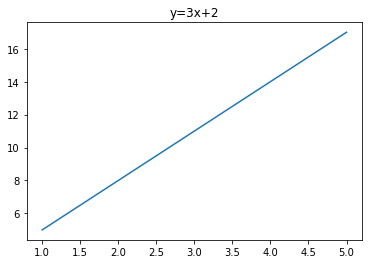

In [14]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.title('y=3x+2')
plt.show()

In [15]:
import tensorflow as tf

model = tf.keras.Sequential([
        tf.keras.layers.Dense(10,input_shape=[4]),
        tf.keras.layers.Dense(5),
        tf.keras.layers.Dense(1),
])

1차 함수식 y=ax+b에서 x값을 나타내는 입력 변수 1개만 존재하기 때문에 input_shape=[1]

In [16]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1,input_shape=[1])
])

In [17]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='sgd',loss='mean_squared_error',
              metrics=['mean_squared_error','mean_absolute_error'])

In [19]:
model.compile(optimizer='sgd',loss='mse',metrics=['mse','mae'])

앞에서 정의한 단순선형회귀 모델을 훈련시키기 위해서 옵티마이저는 확률적 경사하강법 알고리즘인 'sgd',손실함수로는 평균제곱오차인 'mse',그리고 평가지표는 평균절대오차인 'mae'를 지정한다

In [20]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.05),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


epochs를 5로 설정 즉, 5회 반복하여 훈련한다

In [21]:
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 15.4960 - mean_absolute_error: 15.4960 - mean_squared_error: 280.6034
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 14.9960 - mean_absolute_error: 14.9960 - mean_squared_error: 262.7032
Epoch 3/5
1/1 [==============================] - 0s 25ms/step - loss: 14.4960 - mean_absolute_error: 14.4960 - mean_squared_error: 245.3929
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 13.9960 - mean_absolute_error: 13.9960 - mean_squared_error: 228.6727
Epoch 5/5
1/1 [==============================] - 0s 17ms/step - loss: 13.4960 - mean_absolute_error: 13.4960 - mean_squared_error: 212.5425


이번엔 epoch값을 1000으로 넣어 더 많은 훈련을 시켜준다

In [24]:
model = tf.keras.Sequential([
      tf.keras.layers.Dense(1,input_shape=[1])
])
model.compile(optimizer='sgd',loss='mse',metrics=['mae'])

history=model.fit(x,y,epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 290ms/step - loss: 254.2422 - mae: 14.7658
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 148.2032 - mae: 11.3020
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 86.4087 - mae: 8.6577
Epoch 4/1000
1/1 [==============================] - 0s 13ms/step - loss: 50.3976 - mae: 6.6390
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 29.4118 - mae: 5.0979
Epoch 6/1000
1/1 [==============================] - 0s 13ms/step - loss: 17.1821 - mae: 3.9213
Epoch 7/1000
1/1 [==============================] - 0s 8ms/step - loss: 10.0549 - mae: 3.0230
Epoch 8/1000
1/1 [==============================] - 0s 8ms/step - loss: 5.9012 - mae: 2.3372
Epoch 9/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.4804 - mae: 1.8135
Epoch 10/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.0694 - mae: 1.4137
Epoch 11/1000
1/1 [==============================] 

epoch 별 훈련 손실 및 평가지표

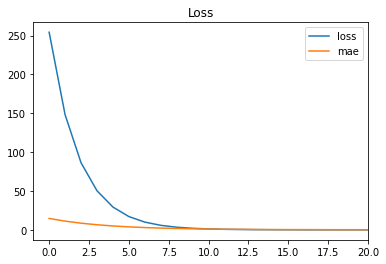

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['mae'],label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

훈련 초기 단계에는 학습이 매우 빠른 속도로 진행되다가 일정 훈련 이후에는 학습 속도가 느려지는 것을 알 수 있다